# Library

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm

In [2]:
from wordcloud import WordCloud, STOPWORDS
import folium

In [3]:
mpl.style.use(['ggplot']) 

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Exploring Datasets with *pandas


In [5]:
crime = pd.read_csv('london_crime_by_lsoa.csv')

and we're gonna look for basic information,

* `.(head) `,`(tail) `: to view top 5 and bottom
* `.(info)`: to get basic information
* `.(shape)`: to view dimensions
* `.columns.values`: to get the list of column headers 
* `.index.values`:  to get the list of indicies 

In [6]:
crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [8]:
crime.shape

(13490604, 7)

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
crime.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [11]:
crime.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [12]:
crime.value.value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
5         58821
6         32035
7         19295
8         12557
9          8712
10         6409
11         4804
12         3736
13         3049
14         2435
15         2105
16         1730
17         1397
18         1253
19         1040
20          918
21          767
22          676
23          627
24          567
25          477
26          444
27          382
28          327
29          308
30          278
31          262
32          231
34          206
33          197
37          176
35          166
36          158
38          153
40          137
39          131
42          120
41          115
43           99
45           95
44           90
49           83
46           78
47           76
48           74
51           73
50           65
55           64
52           62
53           58
57           54
59           53
58           52
54           50
60           48
61           45
56           45
63      

`value`: the count of the crime for that particular borough, in that particular month

we have major 0 value int `value` columns.which is we still don't know how can be 0 , so we are going to make new dataset that contain value except 0

In [13]:
criminal = crime.query('value != 0')

# Exploring Datasets with *pandas

We're gonna explore the datasets , with `.value_counts()`and `.groupby()` to get specific columns values

In [14]:
criminal['borough'].value_counts()

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

In [15]:
criminal['major_category'].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: major_category, dtype: int64

In [16]:
criminal['minor_category'].value_counts()

Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor Vehicle Interf

we just try `.value_counts()` to look some columns values and get some insight ,like

* `borough` most reported crime are in Craydon
* `major_category`most reported are Theft and Handling
* `minor_category`most reported are Burglary in a Dwelling


then we try to grouping some columns using `.groupby()`, to get specific value and distribution.



**distribution value of borough and year**

In [17]:
boro_y=criminal.groupby(['borough','year']).sum()['value'].sort_values(ascending=False)
boro_y

borough                 year
Westminster             2012    59226
                        2011    54243
                        2013    53852
                        2009    48456
                        2016    48330
                        2010    48116
                        2008    47846
                        2014    47564
                        2015    47395
Lambeth                 2016    34071
Camden                  2011    33956
Lambeth                 2012    33473
Southwark               2008    33470
Lambeth                 2011    33224
                        2015    33164
Camden                  2008    32010
Lambeth                 2013    31868
Camden                  2010    31804
Lambeth                 2014    31765
                        2008    31717
                        2010    31671
Southwark               2016    31636
Camden                  2009    31612
                        2012    31472
Ealing                  2010    31360
Southwark            

**distribution value of borough and month**

In [18]:
boro_m=criminal.groupby(['borough','month']).sum()['value'].sort_values(ascending=False)
boro_m

borough                 month
Westminster             12       40341
                        7        40293
                        10       39483
                        11       39412
                        3        38349
                        8        38090
                        1        37928
                        5        37661
                        6        37216
                        4        35934
                        9        35608
                        2        34713
Lambeth                 7        25692
                        10       25649
                        6        25242
                        8        25020
                        11       24877
                        5        24795
Southwark               7        24553
Lambeth                 3        24379
                        9        24214
Southwark               6        24205
                        10       24195
Camden                  5        24181
                        7        2

**Distribution value of borough and major category**

In [19]:
boro_maj =criminal.groupby(['borough','major_category']).sum()['value'].sort_values(ascending=False)
boro_maj

borough                 major_category             
Westminster             Theft and Handling             277617
Camden                  Theft and Handling             140596
Lambeth                 Theft and Handling             114899
Southwark               Theft and Handling             109432
Islington               Theft and Handling             107661
Newham                  Theft and Handling             106146
Kensington and Chelsea  Theft and Handling              95963
Ealing                  Theft and Handling              93834
Wandsworth              Theft and Handling              92523
Croydon                 Theft and Handling              91437
Hackney                 Theft and Handling              91118
Tower Hamlets           Theft and Handling              87620
Barnet                  Theft and Handling              87285
Hammersmith and Fulham  Theft and Handling              86381
Haringey                Theft and Handling              83979
Hillingdon        

In [20]:
boro_maj_ =criminal.groupby(['major_category','borough']).size()
boro_maj_

major_category               borough               
Burglary                     Barking and Dagenham      10585
                             Barnet                    21359
                             Bexley                    10100
                             Brent                     16557
                             Bromley                   17016
                             Camden                    14392
                             City of London               13
                             Croydon                   19747
                             Ealing                    17927
                             Enfield                   17317
                             Greenwich                 12902
                             Hackney                   12796
                             Hammersmith and Fulham    10272
                             Haringey                  15222
                             Harrow                    11890
                             Have

**distribution value of borough and minor category**

In [21]:
boro_min =criminal.groupby(['borough','minor_category']).sum()['value'].sort_values(ascending=False)
boro_min

borough                 minor_category                   
Westminster             Other Theft                          142032
Camden                  Other Theft                           64265
Westminster             Other Theft Person                    56756
Lambeth                 Other Theft                           44006
Southwark               Other Theft                           42879
Kensington and Chelsea  Other Theft                           42217
Islington               Other Theft                           37330
Westminster             Theft From Shops                      35929
Newham                  Other Theft                           33289
Croydon                 Other Theft                           33021
Tower Hamlets           Other Theft                           32995
Westminster             Possession Of Drugs                   32106
Hillingdon              Other Theft                           30488
Hackney                 Other Theft                       

In [22]:
boro_min_ =criminal.groupby(['minor_category','borough']).sum()['value']
boro_min_

minor_category                    borough               
Assault with Injury               Barking and Dagenham      13719
                                  Barnet                    12516
                                  Bexley                     9224
                                  Brent                     17479
                                  Bromley                   13888
                                  Camden                    14516
                                  City of London               29
                                  Croydon                   21322
                                  Ealing                    18027
                                  Enfield                   13902
                                  Greenwich                 16738
                                  Hackney                   15592
                                  Hammersmith and Fulham    11343
                                  Haringey                  16626
                   

**distribution value of year and month**

In [23]:
date=criminal.groupby(['year','month']).sum()['value'].sort_values(ascending=False)
date

year  month
2012  3        67537
2016  7        65519
2008  1        65419
2012  5        64344
2008  7        64126
2011  11       64119
2016  5        63990
2010  7        63764
      3        63629
2011  10       63622
2009  3        63482
2016  10       63405
2008  10       63354
2009  7        63281
2012  7        63280
2009  6        63116
      5        62897
2016  8        62666
2010  6        62632
2011  5        62630
2008  2        62626
      5        62587
2012  11       62514
2015  11       62487
2016  12       62455
2012  1        62436
2011  7        62428
2015  10       62361
2008  6        62290
2012  6        62281
2016  6        62262
2012  8        62143
2010  5        62126
      10       62113
2011  6        61822
2012  10       61728
2015  7        61606
2016  9        61412
2008  11       61395
      3        61343
2011  3        61282
2009  10       61176
2016  11       61064
2015  5        61038
      12       60840
      6        60760
2010  11       60665
2

**Distribution value of major and minor category**

In [24]:
category =criminal.groupby(['major_category','minor_category']).sum()['value'].sort_values(ascending=False)
category

major_category               minor_category                        
Theft and Handling           Other Theft                               980085
                             Theft From Motor Vehicle                  569956
Burglary                     Burglary in a Dwelling                    491282
Violence Against the Person  Harassment                                458124
                             Assault with Injury                       451001
Drugs                        Possession Of Drugs                       431948
Violence Against the Person  Common Assault                            413690
Theft and Handling           Theft From Shops                          345142
                             Other Theft Person                        308842
Criminal Damage              Criminal Damage To Motor Vehicle          265463
Burglary                     Burglary in Other Buildings               263011
Robbery                      Personal Property                         237

# Visualizing Data using Matplotlib

### Area chart

An Area chart or area plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Question**

Bagaimana distribusi major category dengan borough ?

In [25]:
boro_maj

borough                 major_category             
Westminster             Theft and Handling             277617
Camden                  Theft and Handling             140596
Lambeth                 Theft and Handling             114899
Southwark               Theft and Handling             109432
Islington               Theft and Handling             107661
Newham                  Theft and Handling             106146
Kensington and Chelsea  Theft and Handling              95963
Ealing                  Theft and Handling              93834
Wandsworth              Theft and Handling              92523
Croydon                 Theft and Handling              91437
Hackney                 Theft and Handling              91118
Tower Hamlets           Theft and Handling              87620
Barnet                  Theft and Handling              87285
Hammersmith and Fulham  Theft and Handling              86381
Haringey                Theft and Handling              83979
Hillingdon        

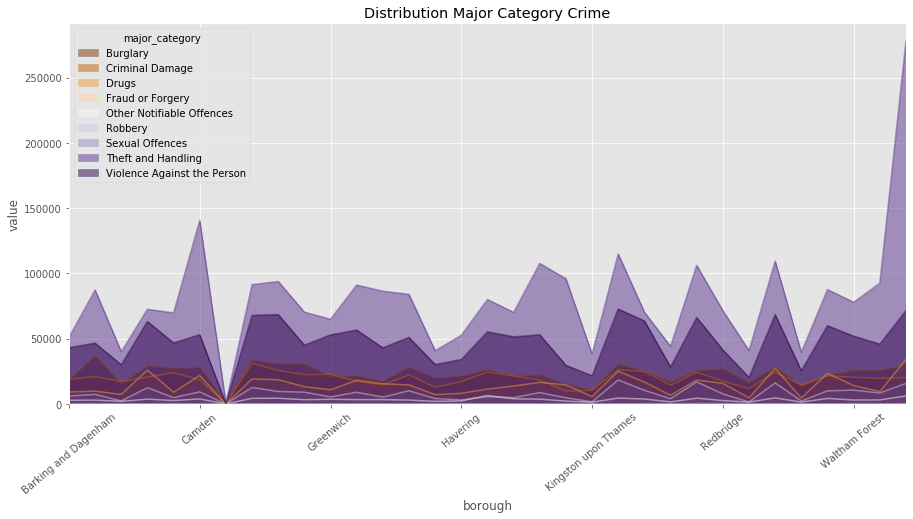

In [26]:
fig, ax = plt.subplots(figsize=(15,7))

boro_maj.unstack().plot(kind='area',ax=ax,stacked=False,cmap='PuOr')
plt.xticks(rotation=40)
ax.set_title('Distribution Major Category Crime')
ax.set_ylabel('value')
ax.set_xlabel('borough')

plt.show()

**Insight**

   1. we can see **'theft and handling' and 'violence againts the person'** are top of list ,
   2. like **'theft and handling' in Westminter** or **' Violence againts the person' in lambeth

**Question**

Apa minor category yang paling sering terjadi didalam major category ?

In [27]:
category.head()

major_category               minor_category          
Theft and Handling           Other Theft                 980085
                             Theft From Motor Vehicle    569956
Burglary                     Burglary in a Dwelling      491282
Violence Against the Person  Harassment                  458124
                             Assault with Injury         451001
Name: value, dtype: int64

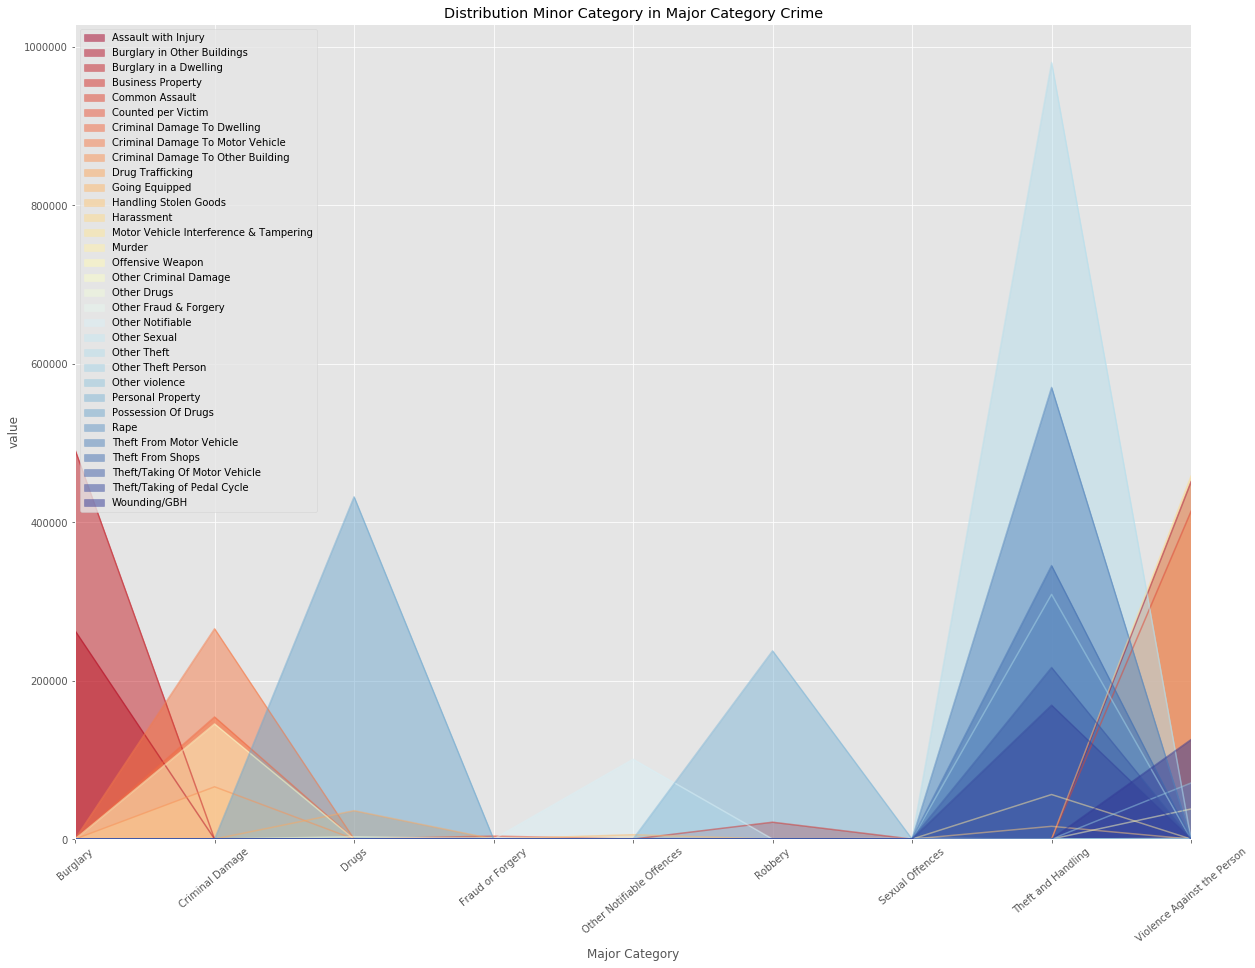

In [28]:
category.unstack().plot(kind='area',stacked=False,figsize=(20, 15),cmap='RdYlBu')
plt.xticks(rotation=40)
plt.title('Distribution Minor Category in Major Category Crime')
plt.ylabel('value')
plt.xlabel('Major Category')

plt.legend(loc='upper left')

plt.show()

**Insight**

    A lot minor category are actually the subset of major category.

   like what we can see is **'Burglary in a Dwelling' ,'Theft From Motor Vehicle ','Other theft '** are top of minor category that frequent to happened . As we know on previous graphic 'Theft and handling' are the most case in major category

### histogram

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question**

Bagaimana distribusi histrogram setiap numeric data yang ada?

In [29]:
criminal.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [30]:
# n_data = len(criminal)

# # Number of bins is the square root of number of data points: n_bins
# n_bins = np.sqrt(n_data)

# # Convert number of bins to integer: n_bins
# n_bins = int(n_bins)


C:\Users\Rendy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


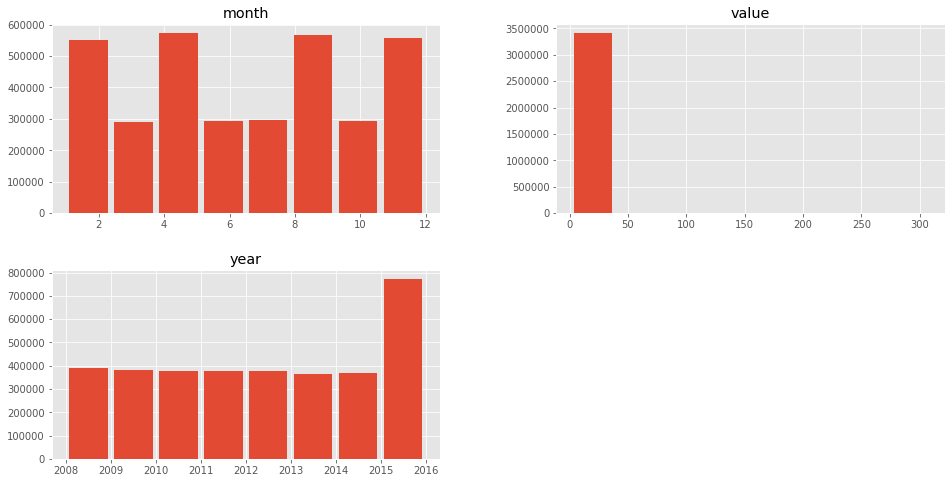

In [31]:
fig = plt.figure(figsize = (16,8))
ax = fig.gca()
criminal.hist(ax=ax,rwidth=0.85,bins=8)
plt.show()

### bar chart

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot


**Question:**

what's the highest crime rate in london?

In [69]:
borough = criminal.groupby(['borough']).sum()['value'].sort_values(ascending=True)
borough.head()

borough
City of London             780
Kingston upon Thames     89306
Richmond upon Thames     96771
Sutton                  100987
Bexley                  114136
Name: value, dtype: int64

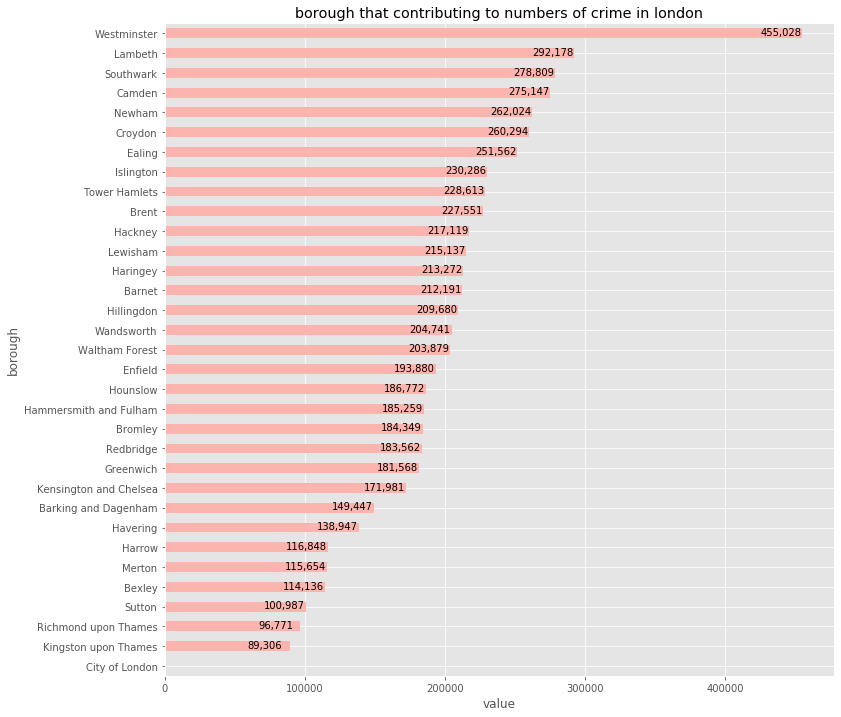

In [70]:
borough.plot(kind='barh', figsize=(12, 12),cmap='Pastel1')
for index, value in enumerate(borough):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 30000, index - 0.10), color='Black')
    
plt.title('borough that contributing to numbers of crime in london')
plt.xlabel('value')
plt.ylabel('borough')

plt.show()

**Insight**

   Terlihat bahwa **Westminster** adalah kota yang paling banyak laporan terjadi tindakan kriminal dengan jumlah sebanyak 455.028 , dan hampir 2 kali lipat nya dari peringkat kedua **( Lambeth = 292.178)** dan **ketiga ( Southwark = 278.809)**


**Question**

  Tindakan Kejahatan apa yang terjadi di Westminster ?

In [34]:
boro_maj['Westminster']

major_category
Theft and Handling             277617
Violence Against the Person     71448
Drugs                           34031
Burglary                        29295
Criminal Damage                 20405
Robbery                         15752
Other Notifiable Offences        6148
Fraud or Forgery                  273
Sexual Offences                    59
Name: value, dtype: int64

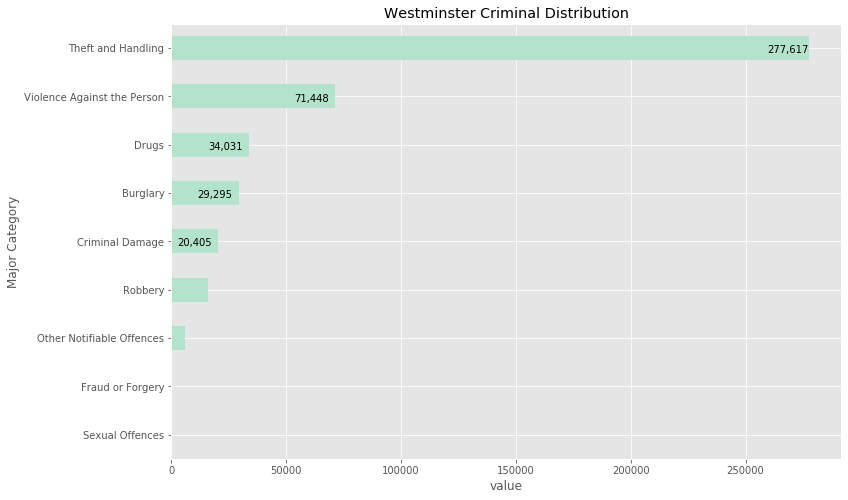

In [35]:
boro_maj['Westminster'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8),cmap='Pastel2')

for index, value in enumerate(boro_maj['Westminster'].sort_values(ascending=True)):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 18000, index - 0.10), color='Black')
    
plt.title('Westminster Criminal Distribution')
plt.xlabel('value')
plt.ylabel('Major Category')

plt.show()

**Insight**

  Mayoritas ialah **Theft and handling dengan 277.617 kasus** , dan di ikuti **Violence againts person** ,**Drugs** kemudian **Burglary.**

**Question**

One of most conduct crime are Theft and Handling, so  Which city with the highest rate of Theft and Handling ?

In [36]:
boro_maj_['Theft and Handling'].sort_values(ascending=False).head()

borough
Lambeth       49676
Southwark     47226
Wandsworth    45497
Ealing        44960
Croydon       44861
dtype: int64

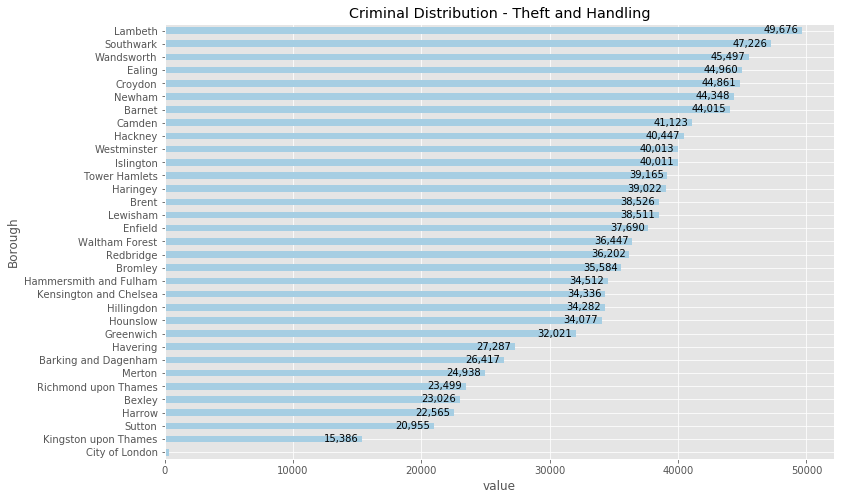

In [37]:
boro_maj_['Theft and Handling'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8),cmap='Paired')

for index, value in enumerate(boro_maj_['Theft and Handling'].sort_values(ascending=True)):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 3000, index - 0.20), color='Black')
    
plt.title('Criminal Distribution - Theft and Handling')
plt.xlabel('value')
plt.ylabel('Borough')

plt.show()

**Insight**

   Kota di london yang paling banyak terdapat kasus "theft and handling' ialah **Lambeth ( 49.676 )** di ikuti **Southwark ( 47.226 )**

**Question**

In minor category,we got 'Other Theft' as the most reported crime. 'Other Theft' Definition from AIC [website](https://aic.gov.au/publications/rpp/rpp129/other-theft) and Police.uk [website](https://www.police.uk/about-this-site/faqs/):
>The category of ‘other theft’ for the purposes of this report includes all thefts that have not been previously included in this report. The principal category of other theft relates to theft from a person without the threat or use of force or violence ( ex.includes theft by an employee , blackmail and making off without payment).

Which city with the highest rate of 'Other Theft ' ?

In [38]:
boro_min_['Other Theft'].sort_values(ascending=False).head()

borough
Westminster               142032
Camden                     64265
Lambeth                    44006
Southwark                  42879
Kensington and Chelsea     42217
Name: value, dtype: int64

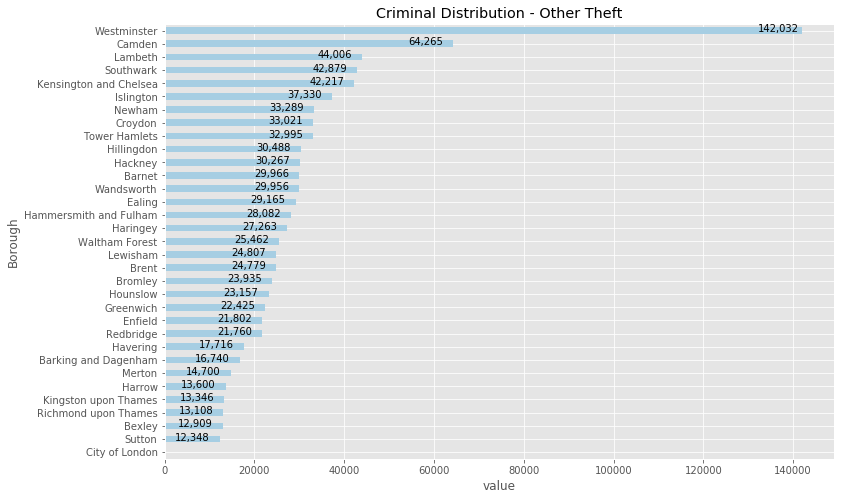

In [39]:
boro_min_['Other Theft'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8),cmap='Paired')

for index, value in enumerate(boro_min_['Other Theft'].sort_values(ascending=True)):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 10000, index - 0.10), color='Black')
    
plt.title('Criminal Distribution - Other Theft')
plt.xlabel('value')
plt.ylabel('Borough')

plt.show()

**Insight**

   **Westminster** is the highest conduct of ' other theft ' with 142.032 report 

### Pie chart

A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword

**Question**

What is the percentage of borough , major and minor category ?

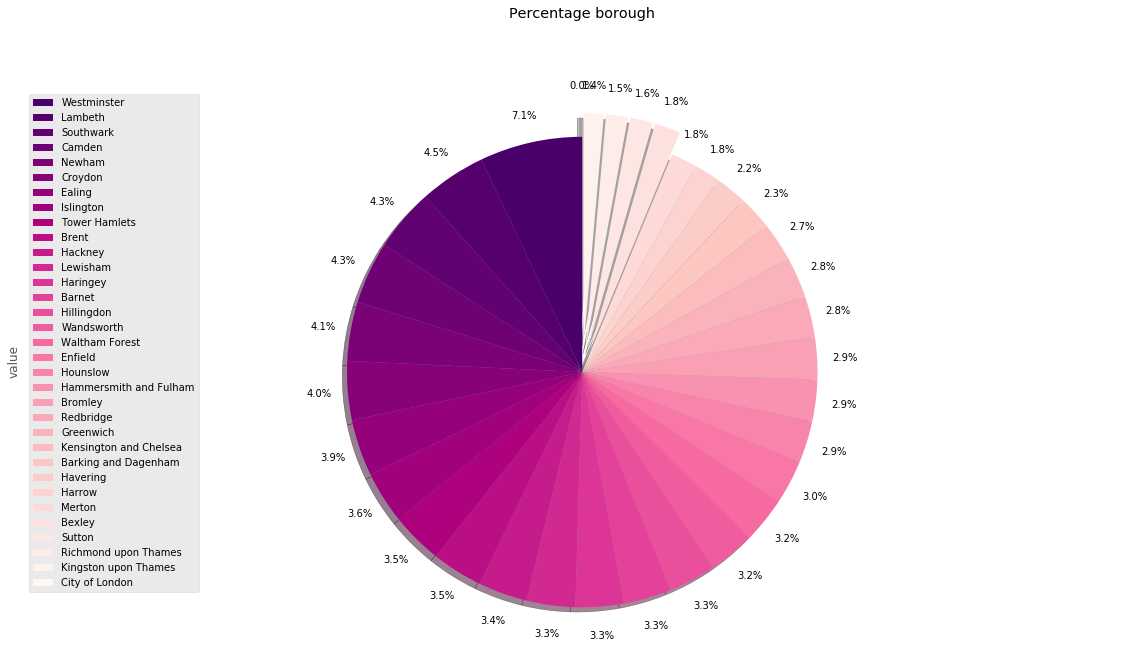

In [40]:
explode_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1] 

borough.plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         
                            pctdistance=1.12,explode=explode_list,cmap = 'RdPu_r'
                            )


plt.title('Percentage borough', y=1.12)

plt.axis('equal')


plt.legend(labels=borough.index, loc='upper left')

plt.show()

In [41]:
major=criminal['major_category'].value_counts()

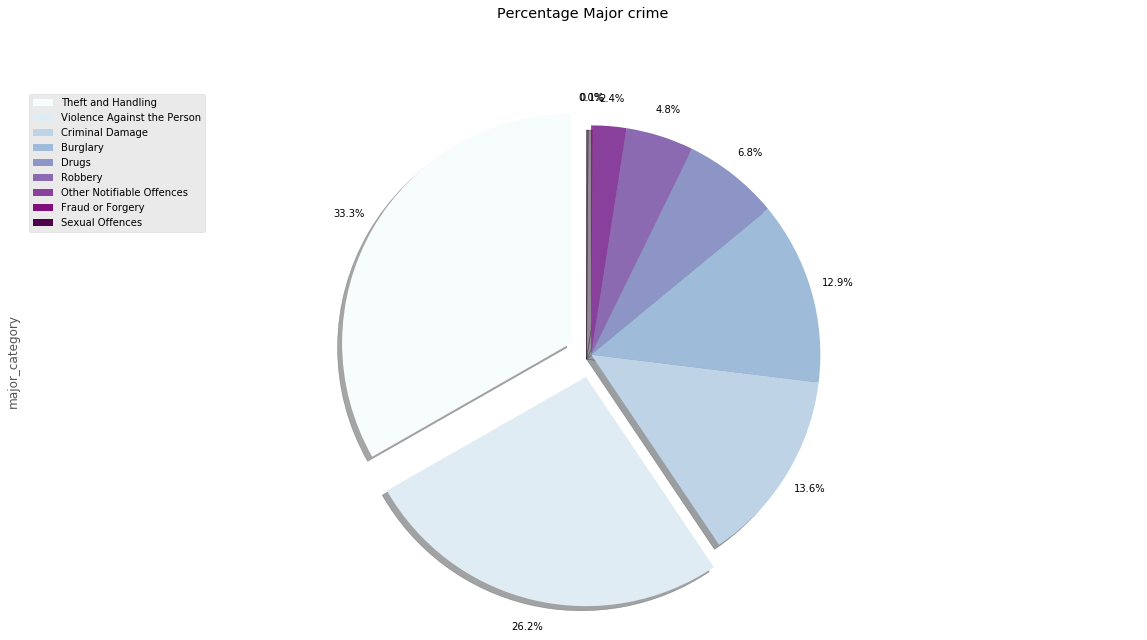

In [42]:
explode_list = [0.1,0.1,0,0,0,0,0,0,0] 

major.plot(kind ='pie',figsize=(20, 10), autopct='%1.1f%%',startangle=90,shadow=True,
           labels=None,pctdistance=1.12,cmap='BuPu',explode=explode_list)


plt.title('Percentage Major crime', y=1.12)

plt.axis('equal')


plt.legend(labels=major.index, loc='upper left')

plt.show()

In [43]:
minor=criminal['minor_category'].value_counts()

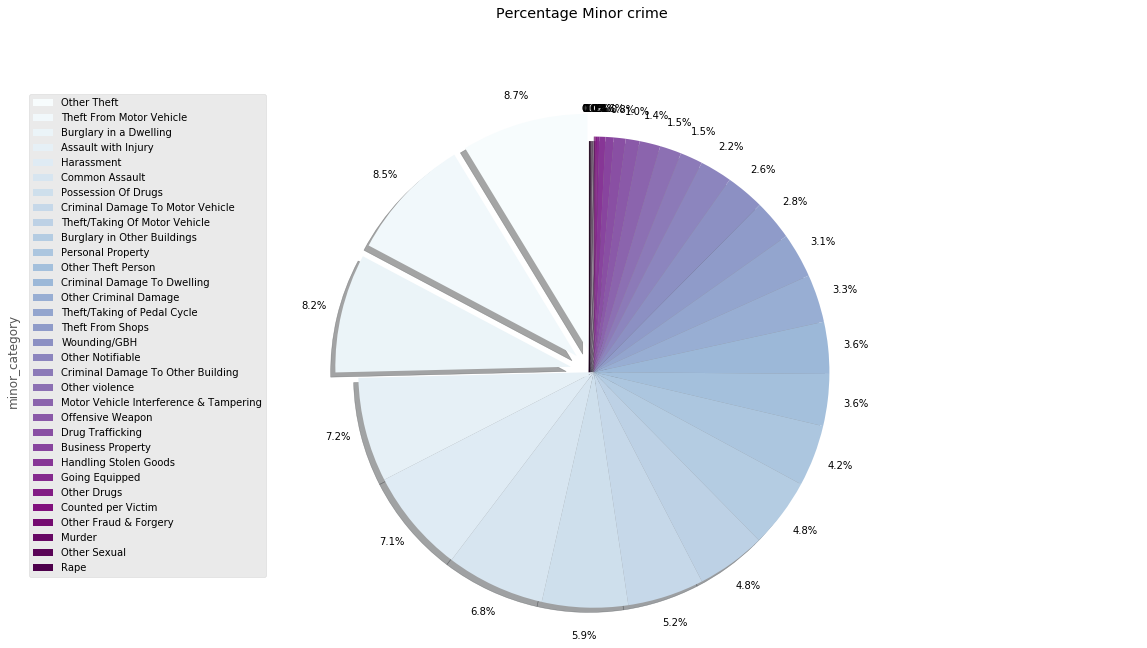

In [44]:
explode_list = [0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  

minor.plot(kind ='pie',figsize=(20, 10), autopct='%1.1f%%',startangle=90,shadow=True,labels=None,
           pctdistance=1.12,cmap='BuPu',explode=explode_list)


plt.title('Percentage Minor crime', y=1.12)

plt.axis('equal')


plt.legend(labels=minor.index, loc='upper left')

plt.show()

**Insight**

Pie chart number :

   1. As we know **Westminster** is top of the list with 7.1 % following Lambeth and Southwark with 4.5% and 4.3%
   2. In Major category **Theft and Handling and Violance againts person** contribute half of london crime report
       with 33.3 % and 26.2%
   3. **Other Theft, Theft from motor vehicle, Burglary in dwelling** takes major crime report with 8.7% 8.5% and 8.2%

### box chart

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

**Question**

Lets analyze our numerical data


In [45]:
criminal.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


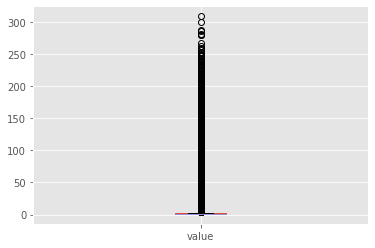

In [46]:
criminal['value'].plot(kind='box')

- **Minimun:** 1
- **First quartile:** 1
- **Second quartile (Median):** 1
- **Third quartile:** 200
- **Maximum:** 309

In [47]:
criminal[criminal['value']>199]

,lsoa_code,borough,major_category,minor_category,value,year,month
247184,E01004734,Westminster,Theft and Handling,Other Theft,241,2009,5
942708,E01033595,Westminster,Theft and Handling,Other Theft,204,2012,3
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
2000692,E01004734,Westminster,Theft and Handling,Other Theft,210,2009,6
2278474,E01004734,Westminster,Theft and Handling,Other Theft,221,2009,4
2823953,E01004734,Westminster,Theft and Handling,Other Theft,237,2011,12
2837126,E01004763,Westminster,Theft and Handling,Other Theft,235,2011,12
2860044,E01004734,Westminster,Theft and Handling,Other Theft,226,2011,10
2884083,E01004734,Westminster,Theft and Handling,Other Theft,240,2011,3
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12


In [48]:
criminal[criminal['value']>300]

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6


Terdapat outliers dimana value bernilai 309. dan itu berada di Tower Hamlets dengan kategorinya Drugs di tahun 2012 bulan ke 6

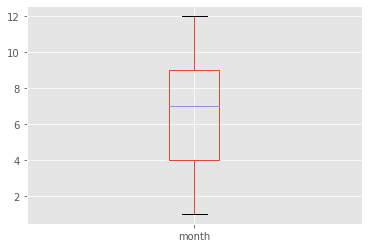

In [49]:
criminal['month'].plot(kind='box')

- **Minimun:** 1
- **First quartile:** 4
- **Second quartile (Median):** 7
- **Third quartile:** 9
- **Maximum:** 12

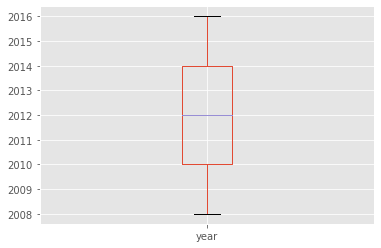

In [50]:
criminal['year'].plot(kind='box')

- **Minimun:** 2008
- **First quartile:** 2010
- **Second quartile (Median):** 2012
- **Third quartile:** 2014
- **Maximum:** 2016

### scatter chart

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

**Question:**

Find out if there are a trend of within month, year or borough it self

In [51]:
month = criminal.groupby(['month']).sum()['value'].sort_values(ascending=True)

In [52]:
year = criminal.groupby(['year']).sum()['value'].sort_values(ascending=True)

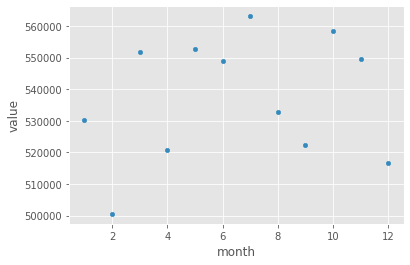

In [53]:
pd.DataFrame(month).reset_index().plot(kind='scatter',x='month',y='value')

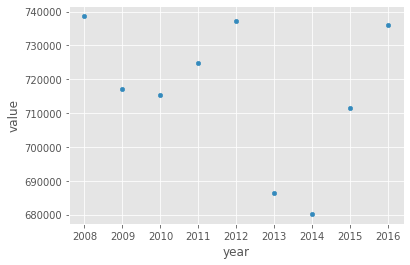

In [54]:
pd.DataFrame(year).reset_index().plot(kind='scatter',x='year',y='value')

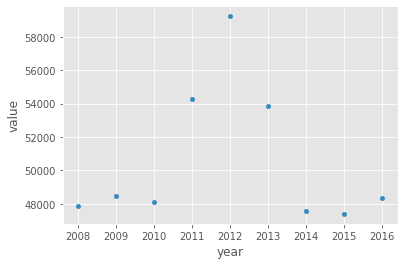

In [55]:
pd.DataFrame(boro_y.loc['Westminster']).reset_index().plot(kind='scatter',x='year',y='value')

**Insight**

Tidak menemukan pattern di month , year dan juga di borough ( Westminster ).
tetapi di dapat beberapa lonjakan seperti,

    1.di year. seperti siklus 4 tahun sekali .dapat di lihat di tahun 2008, 2012, 2016
    2.pada borough westminster terjadi 3 tahun berturut - turut . 2011 , 2012, 2013

### Wordcloud

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [56]:
criminal["Word"] = criminal["major_category"] + criminal["minor_category"]


C:\Users\Rendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
criminal.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,Word
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,Theft and HandlingTheft/Taking of Pedal Cycle
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,Theft and HandlingOther Theft Person
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,Theft and HandlingOther Theft Person
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,Violence Against the PersonHarassment
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,Criminal DamageCriminal Damage To Motor Vehicle


In [58]:
stopwords = set(STOPWORDS)

In [59]:
crime_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

In [60]:
words = " ".join(word for word in criminal[criminal['borough']=='Westminster'].Word)

In [61]:
crime_wc.generate(words)

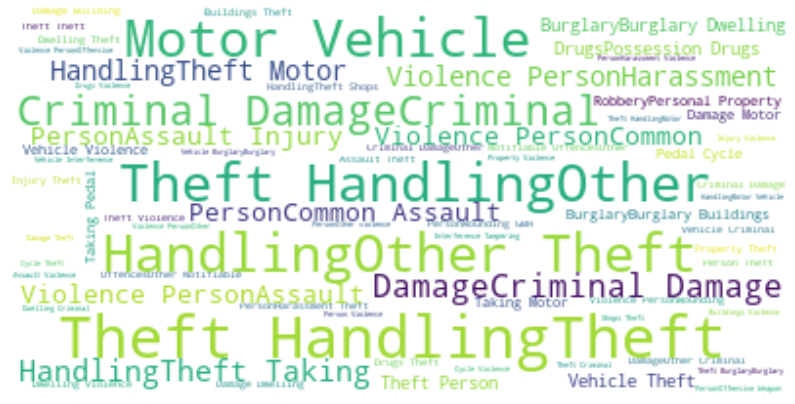

In [62]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 


plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

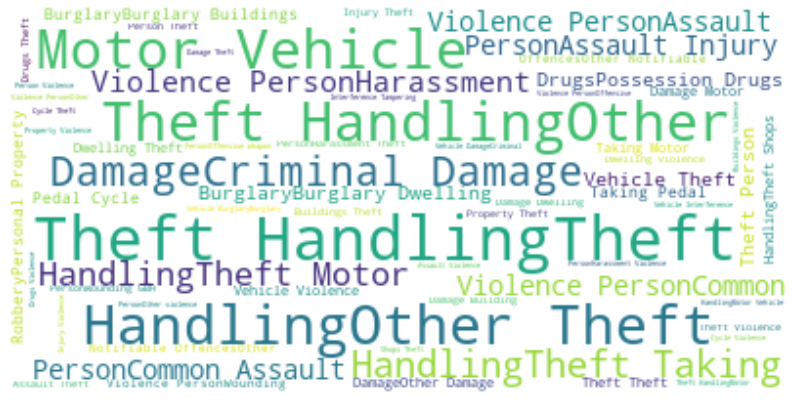

In [63]:
stopwords.add('Criminal')

crime_wc.generate(words)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 


plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### folium


Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

We're going to make 2 columns, to put the coordinates of the cities

In [64]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

lat ={'Croydon':51.37616 ,
 'Lambeth':51.49351,
 'Ealing':51.51325,
 'Southwark':51.50278 ,
 'Barnet':51.65692 ,
 'Newham':51.52552  ,
 'Lewisham':51.46115  ,
 'Brent':51.5588 ,
 'Enfield':51.65230  ,
 'Wandsworth':51.45837  ,
 'Bromley':51.40603 ,
 'Waltham Forest':51.58864  ,
 'Tower Hamlets':51.52026 ,
 'Hackney':51.57345  ,
 'Haringey':51.59061 ,
 'Hillingdon':51.53518 ,
 'Redbridge':51.58861  ,
 'Greenwich':51.49337 ,
 'Hounslow':51.46092 ,
 'Islington':51.53862 ,
 'Camden':51.5290 ,
 'Westminster':51.49749  ,
 'Hammersmith and Fulham':51.49902  ,
 'Havering':51.57792 ,
 'Barking and Dagenham':51.55407 ,
 'Bexley':51.43993 ,
 'Harrow':51.58056  ,
 'Merton':51.40977 ,
 'Kensington and Chelsea':51.49908 ,
 'Sutton':51.36143 ,
 'Richmond upon Thames':51.46131 ,
 'Kingston upon Thames':51.41233 ,
 'City of London':51.51234 } 

long ={'Croydon':-0.09823 ,
 'Lambeth':-0.11784,
 'Ealing':-0.30431 ,
 'Southwark':-0.08774 ,
 'Barnet':-0.19493 ,
 'Newham':0.03522 ,
 'Lewisham':-0.00732 ,
 'Brent':0.2817 ,
 'Enfield':-0.08071 ,
 'Wandsworth':-0.18914 ,
 'Bromley':0.01316 ,
 'Waltham Forest':-0.01176 ,
 'Tower Hamlets':-0.02934 ,
 'Hackney':-0.07244 ,
 'Haringey':-0.11097 ,
 'Hillingdon':-0.44814 ,
 'Redbridge':0.08240 ,
 'Greenwich':0.00982 ,
 'Hounslow':-0.37315 ,
 'Islington':-0.10283 ,
 'Camden':0.1255 ,
 'Westminster':-0.13566 ,
 'Hammersmith and Fulham':-0.22915 ,
 'Havering':0.21208 ,
 'Barking and Dagenham':0.13402 ,
 'Bexley':0.15433 ,
 'Harrow':-0.34199 ,
 'Merton':-0.21081 ,
 'Kensington and Chelsea':-0.19383 ,
 'Sutton':-0.19396 ,
 'Richmond upon Thames':-0.30374 ,
 'Kingston upon Thames':-0.30069 ,
 'City of London':-0.09099 }

In [65]:
criminal['latitude'] = criminal['borough'].apply(set_value, args =(lat, )) 
criminal['longitude'] = criminal['borough'].apply(set_value, args =(long, )) 

C:\Users\Rendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
criminal.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,Word,latitude,longitude
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,Theft and HandlingTheft/Taking of Pedal Cycle,51.36143,-0.19396
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,Theft and HandlingOther Theft Person,51.55407,0.13402
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,Theft and HandlingOther Theft Person,51.51325,-0.30431
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,Violence Against the PersonHarassment,51.57345,-0.07244
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,Criminal DamageCriminal Damage To Motor Vehicle,51.40603,0.01316


In [67]:
london = folium.Map(location=[51.507140, -0.129981], zoom_start=12)

london

In [68]:
# from folium import plugins

# london = folium.Map(location=[51.507140, -0.129981], zoom_start=12)


# incidents = plugins.MarkerCluster().add_to(london)

# for lat, lng, label, in zip(criminal.latitude, criminal.longitude, criminal.major_category):
#     folium.Marker(
#         location=[lat, lng],
#         icon=None,
#         popup=label,
#     ).add_to(incidents)

# london

KeyboardInterrupt: 

In [ ]:

# london = folium.Map(location=[51.507140, -0.129981], zoom_start=12)


# for lat, lng, label in zip(criminal.latitude, criminal.longitude, criminal.major_category):
#     folium.CircleMarker(
#         [lat, lng],
#         radius=5, 
#         color='yellow',
#         fill=True,
#         popup=label,
#         fill_color='blue',
#         fill_opacity=0.6
#     ).add_to(london)


# london